In [121]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [146]:
#constants for 2 neurons
N = 2
it = 1000
b = np.asarray([0,0])
w = np.asarray([[0.2, 0], [0, -0.2]])
x0 = np.asarray([0.2,-0.30])
pShape = 150

print(w@x0)

[0.04 0.06]


In [123]:
def orbit(w, x0, b, n, it, func, nSkip = 100):
    """ 
    Parameters: 
    w - weights of neurons. Shape: nxn 
    x0 - initial conditions. Shape: 1xn
    b - biases. Shape: 1xn
    n - number of neurons.
    it - number of iterations.
    func - activation function. Takes parameter y_i, returns y_i+1, shape(1,n)

    Returns:
    y - orbit, points of x_i+1. shape(it+1, n)
    """

    y = np.zeros((it+1, n))
    y[0] = x0

    for i in range(1, it+1):
        y[i] = b + w@func(y[i-1])
    
    return y[nSkip:]



In [124]:
def tanh(x):
    return np.tanh(x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

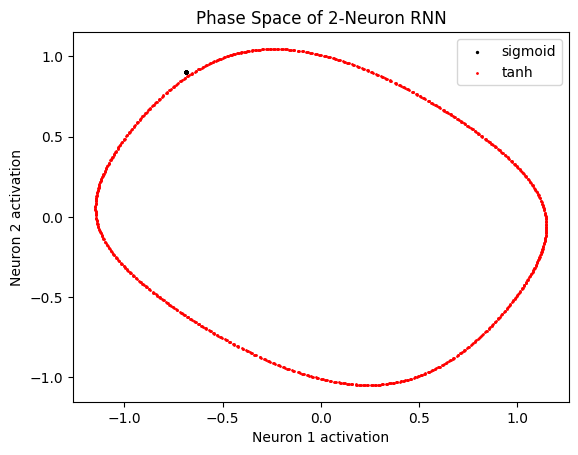

In [129]:

w = np.array([[0.5, -1.2], [1.0, 0.8]])  # weight matrix for 2 neurons
x0 = np.array([0.1, 0.1])  # initial conditions for neurons
b = np.array([0.0, 0.0])   # biases for neurons
n = 2                      # number of neurons
it = 1000                  # number of iterations

orbit_result = orbit(w, x0, b, n, it, sigmoid)
orbit_result_t = orbit(w, x0, b, n, it, tanh)

plt.scatter(orbit_result[:,0], orbit_result[:,1],c='k',s=2, label="sigmoid")
plt.scatter(orbit_result_t[:,0], orbit_result_t[:,1],c='r',s=1, label = "tanh")
plt.xlabel('Neuron 1 activation')
plt.ylabel('Neuron 2 activation')
plt.title('Phase Space of 2-Neuron RNN')
plt.legend()
plt.show()

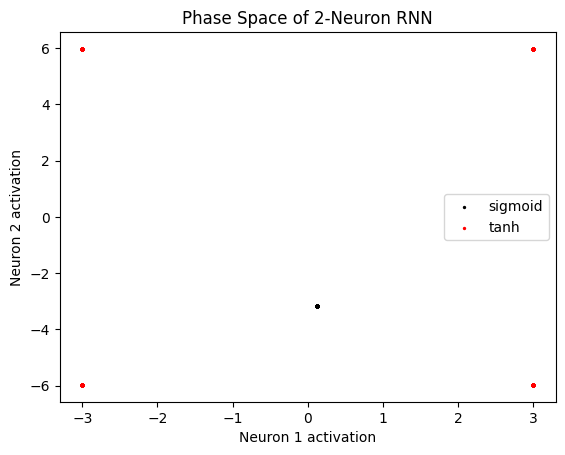

In [180]:
w = np.array([[0, 3], [-6, 0]])  # weight matrix for 2 neurons
x0 = np.array([0.1, 0.1])  # initial conditions for neurons
b = np.array([0.0, 0.0])   # biases for neurons
n = 2                      # number of neurons
it = 1000                  # number of iterations

orbit_result = orbit(w, x0, b, n, it, sigmoid)
orbit_result_t = orbit(w, x0, b, n, it, tanh)

plt.scatter(orbit_result[:,0], orbit_result[:,1],c='k',s=2, label="sigmoid")
plt.scatter(orbit_result_t[:,0], orbit_result_t[:,1],c='r',s=2, label = "tanh")
plt.xlabel('Neuron 1 activation')
plt.ylabel('Neuron 2 activation')
plt.title('Phase Space of 2-Neuron RNN')
plt.legend()
plt.show()

In [155]:
# Function to detect period
def detect_period(orbit, tolerance=1e-3):
    # Loop through the orbit and find repeating patterns
    for period in range(1, 5):
        if np.allclose(orbit[-period:], orbit[-2*period:-period], atol=tolerance):
            return period
    return np.inf  # Return infinity if no period is found


def find_p(actfunc, w_1, w_2):
    periods = np.zeros((pShape, pShape))

    for i, w1 in tqdm(enumerate(w_1)):
        for j, w2 in enumerate(w_2):
            w = np.asarray([[w1, w2], [-6, 0]])
            periods[i, j] = detect_period(orbit(w, np.asarray([0.1,0.1]), b, N, it, actfunc))
            
    return periods


In [154]:
p_value_storage_tanh = np.zeros((5, pShape, pShape))
p_value_storage_sigmoid = np.zeros((5, pShape, pShape))

Don't run the code below again please :)

In [156]:
analysis_values = [-28, -18, -8, -3]

for i, v in enumerate(analysis_values):
    w11 = np.linspace(v,0,pShape)
    w12 = np.linspace(0,-v,pShape)  

    p_value_storage_sigmoid[i] = find_p(sigmoid, w11, w12)
    p_value_storage_tanh[i] = find_p(tanh, w11, w12)


150it [01:24,  1.77it/s]
150it [00:38,  3.85it/s]
150it [01:24,  1.77it/s]
150it [00:38,  3.86it/s]
150it [01:25,  1.75it/s]
150it [00:39,  3.84it/s]
150it [01:24,  1.77it/s]
150it [00:39,  3.81it/s]


Text(0.45, 0.5, 'Tanh activation function')

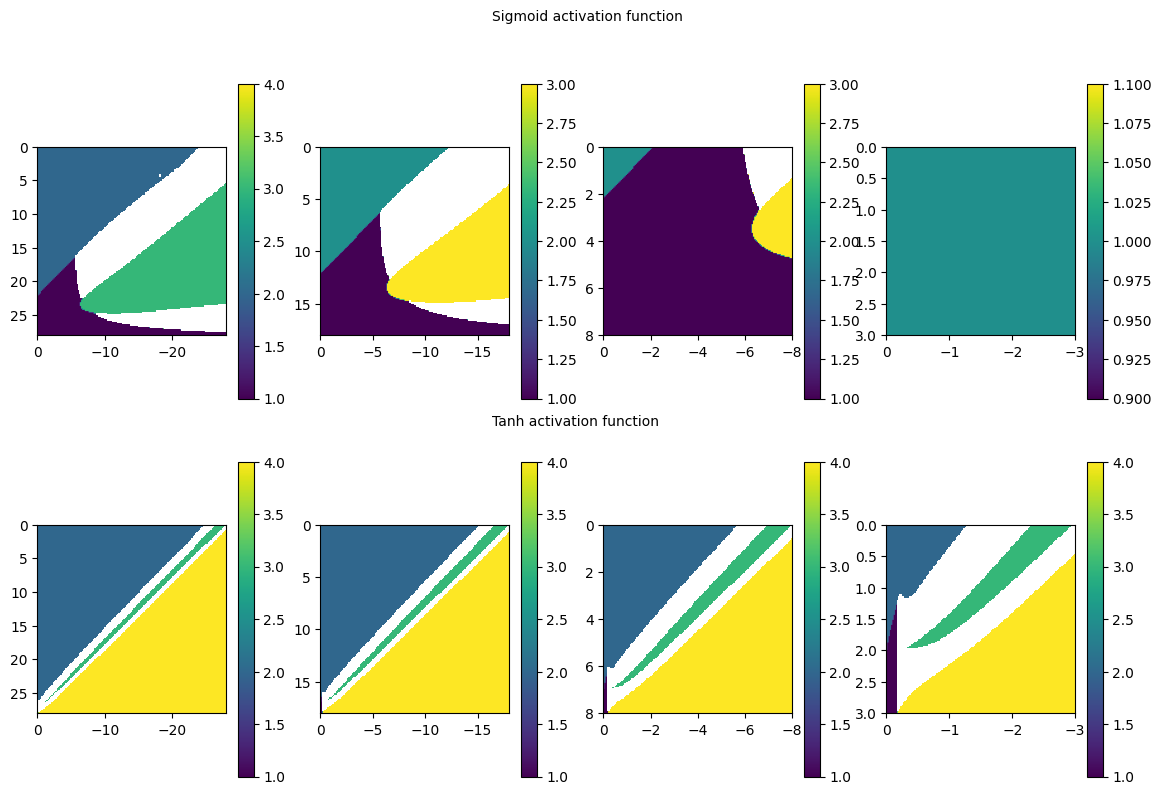

In [183]:
fig, ax = plt.subplots(2, 4, figsize=(14, 9))
# ax = ax.flatten()
for i,v in enumerate(analysis_values):
    c = ax[0, i].imshow(p_value_storage_sigmoid[i], extent=(0, v, -v, 0))
    # ax[1,i].colorbar(label="Period")
    plt.colorbar(c)
    # ax[0].set_title("Sigmoid")

    d = ax[1, i].imshow(p_value_storage_tanh[i],  extent=(0, v, -v, 0))
    plt.colorbar(d)

    # ax[1].set_title("Tanh")


fig.text(0.45, 0.95, "Sigmoid activation function")
fig.text(0.45, 0.50, "Tanh activation function")

